# Set up the environment:

In [2]:
%matplotlib inline
import numpy as np
from scipy.optimize import minimize, basinhopping
import sambuca as sb
import matplotlib.pyplot as plt
from pkg_resources import resource_filename
from scipy.io import loadmat
import spectral as sp
import spectral.io.envi as envi

# set some controls on numpy formatting
# 5 decimal places, suppress scientific notation
np.set_printoptions(precision=5, suppress=True)

# set the matplotlib style to emulate ggplot2 from R
plt.style.use('ggplot')
plot_width = 9
plot_height = plot_width * 3/4

# spectra to plot
plot_items = list()

# Utility Functions

In [12]:
def print_spectral_library(lib):
    #print(dir(lib))
    print("Named Bands:")
    for band_name in lib.names:
        print("\t" + band_name)
    print("Data dimensions: " + str(lib.spectra.shape))
    #print("Available Metadata:")
    #for key in lib.metadata:
    #    print("\t" + key)
        
        
def plot_spectra(plot_items, band_centers, show_legend=True):
    plt.figure(figsize=(plot_width, plot_height))
    for pi in plot_items:
        plt.plot(band_centers, pi[0], label=pi[1])

    # set the X axis range
    plt.xlim(np.min(band_centers), np.max(band_centers))
            
    if show_legend:
        plt.legend(loc='upper right')
        
    plt.show()
    
def get_filter(name):
    return envi.open(
        '../sensor_filters/{0}.hdr'.format(name),
        '../sensor_filters/{0}.lib'.format(name))

In [13]:
def plot_filter(filter, show_legend=True):
    items = []
    i = 0
    for band in filter.names:
        items.append((filter.spectra[i], band))
        i = i + 1
    
    plot_spectra(items, filter.bands.centers, show_legend)

#Sensor Filter Plots

##CASIO4

In [8]:
c4 = get_filter('SAMBUCA_FILTER_CASI04_350_900_1nm')
print_spectral_library(c4)

Named Bands:
	filter      439.300
	filter      459.600
	filter      479.100
	filter      498.600
	filter      516.300
	filter      531.300
	filter      547.300
	filter      564.200
	filter      574.600
	filter      584.900
	filter      594.400
	filter      603.800
	filter      614.300
	filter      624.700
	filter      634.200
	filter      643.700
	filter      654.200
	filter      664.600
	filter      674.200
	filter      682.800
	filter      691.300
	filter      699.900
	filter      707.600
	filter      716.200
	filter      732.500
	filter      752.600
	filter      759.300
	filter      778.500
	filter      865.900
	filter      938.900
Data dimensions: (30, 551)


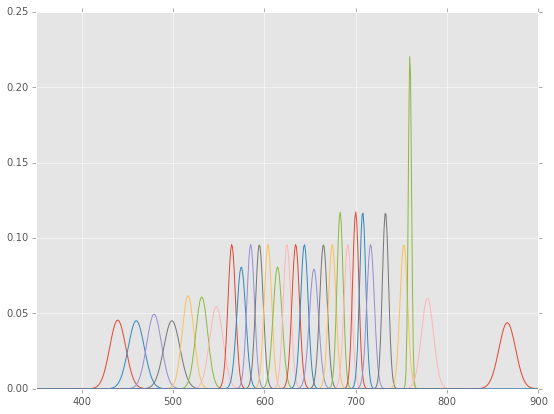

In [14]:
plot_filter(c4, show_legend=False)